<a href="https://colab.research.google.com/github/khodjasCode/for_mohirdev/blob/main/DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import fastai

In [12]:
from fastai.vision.all import *
import numpy as np

# Download and extract the CamVid dataset
path = untar_data(URLs.CAMVID_TINY)

# Function to get the label path for an image
def label_getter(file):
    return path/'labels'/f'{file.stem}_P{file.suffix}'

# Create a DataLoaders object for segmentation
dls = SegmentationDataLoaders.from_label_func(
    path,
    bs=8,  # Specify the batch size here
    fnames=get_image_files(path/'images'),
    label_func=label_getter,
    codes=np.loadtxt(path/'codes.txt', dtype=str)
)

# Create a learner with a U-Net model
learn = unet_learner(dls, resnet34)

# Fine-tune the model
learn.fine_tune(12)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 75.5MB/s]


epoch,train_loss,valid_loss,time
0,2.977014,3.483956,01:33


epoch,train_loss,valid_loss,time
0,2.155195,1.898905,01:47
1,1.856976,1.433836,01:35
2,1.640778,1.360178,01:33
3,1.476538,1.098449,01:32
4,1.324921,0.977248,01:32
5,1.189360,0.850492,01:38
6,1.074966,0.793921,01:33
7,0.972866,0.738697,01:30
8,0.884570,0.733808,01:32
9,0.810562,0.728670,01:33


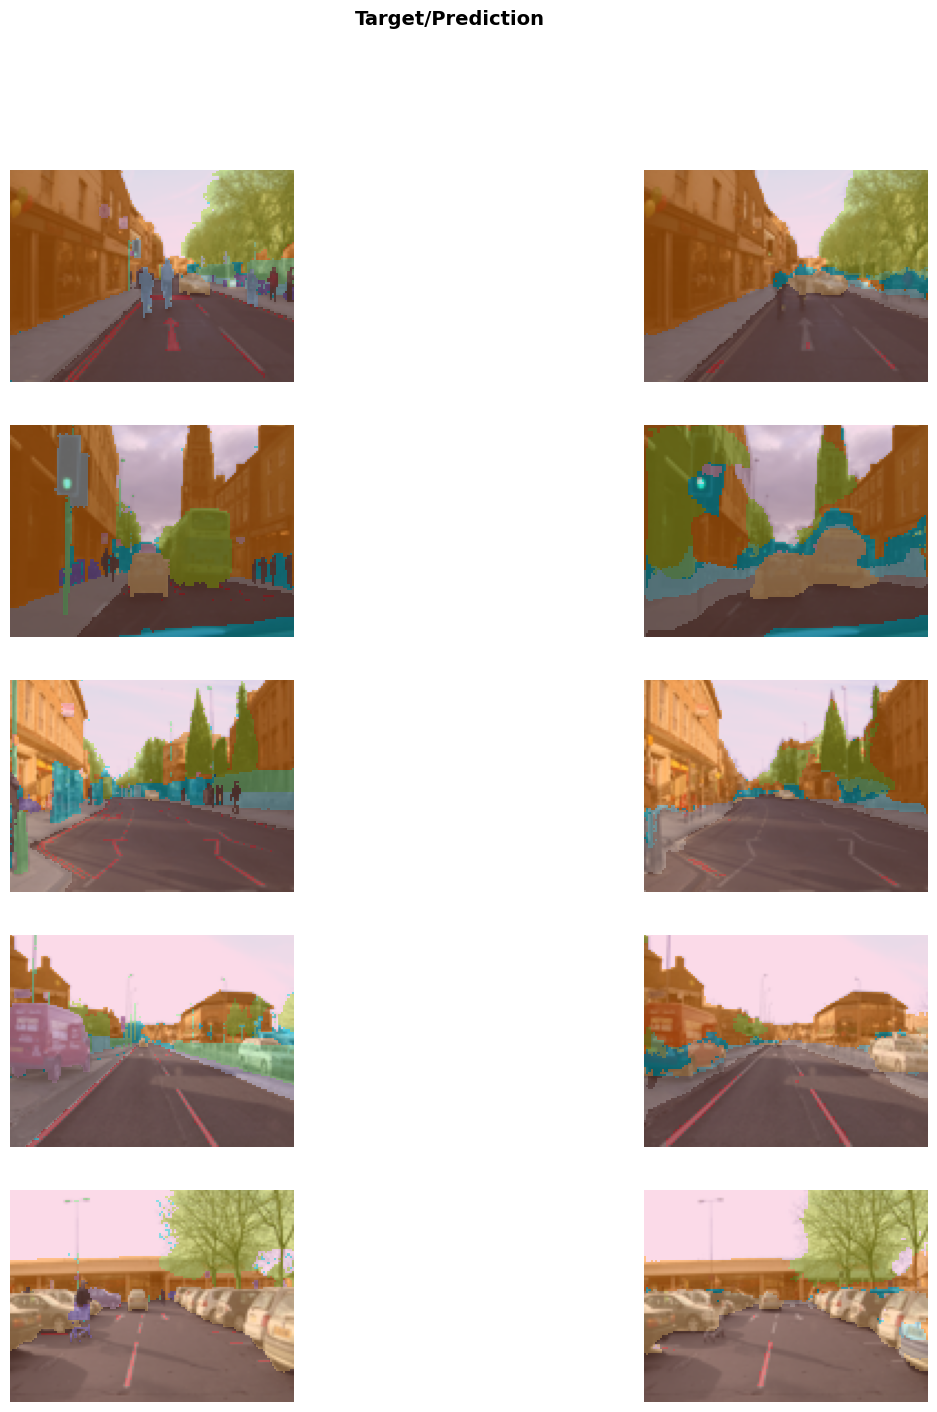

In [13]:
learn.show_results(max_n = 5, figsize = (15, 16))

NLP

In [1]:
import torch
import fastai

In [3]:
from fastai.text.all import *
path = untar_data(URLs.IMDB) # dataset

# dataloader
dls = TextDataLoaders.from_folder(path, train = 'train', valid = 'test')

# fine-tune
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics = accuracy)
learn.fine_tune(4, 0.01)

/usr/local/lib/python3.11/dist-packages/fastai/text/learner.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

epoch,train_loss,valid_loss,accuracy,time
0,0.464480,0.393743,0.823560,03:25


epoch,train_loss,valid_loss,accuracy,time
0,0.305634,0.265368,0.891080,07:24
1,0.241387,0.201734,0.921480,07:23


epoch,train_loss,valid_loss,accuracy,time
0,0.305634,0.265368,0.891080,07:24
1,0.241387,0.201734,0.921480,07:23
2,0.186210,0.191739,0.925920,07:23
3,0.152806,0.201883,0.925440,07:23


In [15]:
pred, prob_id, probs = learn.predict("I didn't like that movie! It is horrible! I didn't even stay for 15 minutes..")
print(f'This comment is: {pred}')
print(f'Probability: {probs[prob_id]*100:.1f}%')

This comment is: neg
Probability: 98.8%


In [12]:
pred, prob_id, probs = learn.predict("I really liked that movie! It is fantastic!")
print(f'This comment is: {pred}')
print(f'Probability: {probs[prob_id]*100:.1f}%')

This comment is: pos
Probability: 100.0%


Tabular Data

In [21]:
from fastai.tabular.all import *
# dataset
path = untar_data(URLs.ADULT_SAMPLE)
# dataloader
dls = TabularDataLoaders.from_csv(path/'adult.csv', path = path, bs = 64, y_names = 'salary', skipinitialspace=False,
                                  cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'],
                                  cont_names = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'],
                                  procs = [Categorify, FillMissing, Normalize])
# train
learn = tabular_learner(dls, metrics = accuracy)
learn.fit_one_cycle(4)

/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


epoch,train_loss,valid_loss,accuracy,time
0,0.357886,0.349002,0.839834,00:04
1,0.328179,0.326458,0.849662,00:04
2,0.327419,0.329562,0.845670,00:04
3,0.314286,0.324376,0.847052,00:05


In [22]:
import pandas

df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [24]:
row, pred, probs = learn.predict(df.iloc[2])
pred.item(), probs

/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)
/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  to[n].fillna(self.na_dict[n], inplace=Tr

(0, tensor([0.9862, 0.0138]))